# Understanding

In [ ]:
import pandas as pd
import json
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta
import seaborn as sns

In [5]:
path_file = 'data/MC2/mc2.json' 

with open(path_file, 'r', encoding='utf-8') as f:
    data = json.load(f)

# Creazione dei DataFrame
nodes_df = pd.DataFrame(data['nodes'])
links_df = pd.DataFrame(data['links'])

nodes_df = nodes_df.rename(columns={
    'name': 'commodity_name', 
    'Name': 'entity_name'     
})

print(f"\nAbbiamo {len(nodes_df)} nodi e {len(links_df)} collegamenti.")
display(nodes_df.head(3))
display(links_df.head(3))


Abbiamo 5637 nodi e 271643 collegamenti.


,type,_last_edited_by,_date_added,_last_edited_date,_raw_source,_algorithm,commodity_name,id,entity_name,Description,Activities,kind,qty_tons,date,flag_country,company,tonnage,length_overall,style,fish_species_present
0,Entity.Commodity.Fish,Clepper Jessen,2033-09-04T00:00:00,2035-01-25T00:00:00,,,Cod/Gadus n.specificatae,gadusnspecificatae4ba,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Entity.Commodity.Fish,Clepper Jessen,2034-01-21T00:00:00,2035-01-04T00:00:00,,,Birdseye/Pisces frigus,piscesfrigus900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Entity.Commodity.Fish,Haenyeo Hyun-Ki,2033-06-22T00:00:00,2035-01-14T00:00:00,,,Sockfish/Pisces foetida,piscesfoetidaae7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


,type,time,dwell,_last_edited_by,_date_added,_last_edited_date,_raw_source,_algorithm,source,target,key,date,data_author,aphorism,holiday_greeting,wisdom,saying of the sea
0,Event.TransportEvent.TransponderPing,2035-09-16T04:06:48.185987,115074.790577,Olokun Daramola,2035-09-16T00:59:46.300100,2035-09-16T00:59:46.300100,Oceanus Vessel Locator System,OVLS-Catch&Hook,City of Haacklee,perchplundererbc0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,Event.TransportEvent.TransponderPing,2035-09-20T05:21:33.678120,412706.321880,Melinda Manning,2035-09-22T02:37:37.400986,2035-09-22T02:37:37.400986,Oceanus Vessel Locator System,OVLS-Catch&Hook,City of Haacklee,perchplundererbc0,1,NaN,NaN,NaN,NaN,NaN,NaN
2,Event.TransportEvent.TransponderPing,2035-09-28T04:31:47.118191,286092.881809,Olokun Daramola,2035-09-29T02:28:52.095772,2035-10-01T02:28:52.095772,Oceanus Vessel Locator System,OVLS-Catch&Hook,City of Haacklee,perchplundererbc0,2,NaN,NaN,NaN,NaN,NaN,NaN


## Removing Useless Attributes

In [7]:
# Lista delle colonne da rimuovere
cols_to_drop = [
    'aphorism', 'holiday_greeting', 'wisdom', 'saying of the sea', 
    '_date_added', '_last_edited_date', '_last_edited_by', 
    'data_author', '_raw_source', 'key'
]

links = links_df.drop(columns=cols_to_drop, errors='ignore')

nodes = nodes_df.drop(columns=cols_to_drop, errors='ignore')

export_data = {
    "nodes": nodes.to_dict(orient='records'),
    "links": links.to_dict(orient='records')
}

nodes.to_csv('data/nodes.csv', index=False)
links.to_csv('data/links.csv', index=False)

## Missing value Check

In [8]:
import pandas as pd

colonne_metriche = ['tonnage', 'length_overall', 'qty_tons']

# converti a numerico
colonne_esistenti = [col for col in colonne_metriche if col in nodes.columns]

for col in colonne_esistenti:
    nodes[col] = pd.to_numeric(nodes[col], errors='coerce')

# Calcola Media e Count (Non-Null) per le colonne specifiche
stats = nodes.groupby('type')[colonne_esistenti].agg(['mean', 'count'])

# Calcola il Totale assoluto di entità per quel gruppo (inclusi i null)
totale_entita = nodes.groupby('type').size().to_frame(name='TOTALE ENTITÀ')

# Unisci tutto insieme
report_completo = pd.concat([totale_entita, stats], axis=1)

display(report_completo.style.format("{:.2f}"))

,TOTALE ENTITÀ,"('tonnage', 'mean')","('tonnage', 'count')","('length_overall', 'mean')","('length_overall', 'count')","('qty_tons', 'mean')","('qty_tons', 'count')"
type,,,,,,,
Entity.Commodity.Fish,10.00,nan,0.00,nan,0.00,nan,0.00
Entity.Document.DeliveryReport,5307.00,nan,0.00,nan,0.00,23.79,5307.00
Entity.Location.City,6.00,nan,0.00,nan,0.00,nan,0.00
Entity.Location.Point,12.00,nan,0.00,nan,0.00,nan,0.00
Entity.Location.Region,6.00,nan,0.00,nan,0.00,nan,0.00
Entity.Vessel.CargoVessel,100.00,34906.00,100.00,160.30,100.00,nan,0.00
Entity.Vessel.Ferry.Cargo,2.00,nan,0.00,nan,0.00,nan,0.00
Entity.Vessel.Ferry.Passenger,3.00,nan,0.00,nan,0.00,nan,0.00
Entity.Vessel.FishingVessel,178.00,3480.90,178.00,78.60,178.00,nan,0.00


## Statistics

In [9]:
nodes.describe()

,qty_tons,tonnage,length_overall
count,5307.000000,278.000000,283.000000
mean,23.791549,14784.892086,107.314488
std,17.141913,24871.998416,59.550890
min,-10.000000,100.000000,10.000000
25%,10.875000,1400.000000,70.000000
50%,22.500000,3350.000000,90.000000
75%,33.750000,10750.000000,130.000000
max,111.000000,76300.000000,230.000000


In [10]:
links.describe()

,dwell
count,2.585420e+05
mean,1.977547e+04
std,7.242468e+04
min,0.000000e+00
25%,4.694915e+03
50%,6.287493e+03
75%,1.210113e+04
max,2.873532e+07


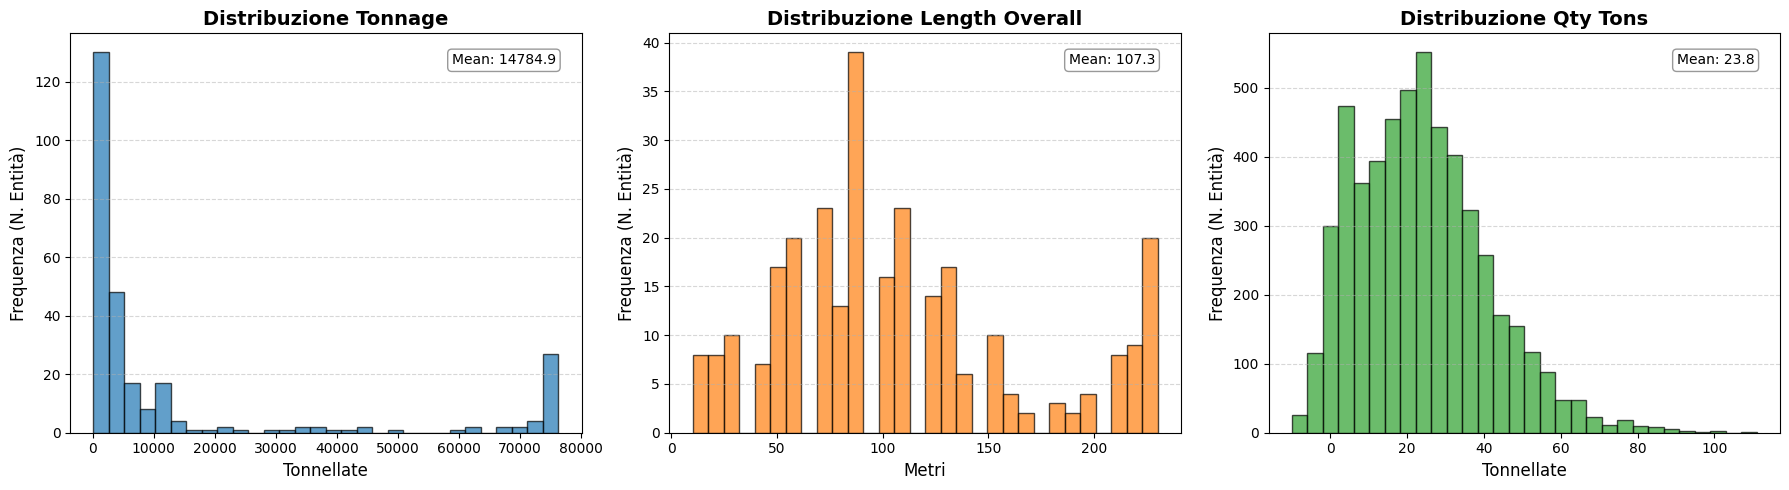

In [11]:
cols_to_plot = ['tonnage', 'length_overall', 'qty_tons']
for col in cols_to_plot:
    nodes[col] = pd.to_numeric(nodes[col], errors='coerce')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Colori per distinguere i grafici
colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
titles = ['Distribuzione Tonnage', 'Distribuzione Length Overall', 'Distribuzione Qty Tons']
x_labels = ['Tonnellate', 'Metri', 'Tonnellate']

for i, col in enumerate(cols_to_plot):
    # Rimuoviamo i NaN temporaneamente solo per il plot
    data = nodes[col].dropna()
    
    # Creiamo l'istogramma
    axes[i].hist(data, bins=30, color=colors[i], edgecolor='black', alpha=0.7)
    
    # Impostazioni estetiche
    axes[i].set_title(titles[i], fontsize=14, fontweight='bold')
    axes[i].set_xlabel(x_labels[i], fontsize=12)
    axes[i].set_ylabel('Frequenza (N. Entità)', fontsize=12)
    
    # Aggiunge una griglia leggera
    axes[i].grid(axis='y', alpha=0.5, linestyle='--')

    # Statistiche rapide nel titolo o sottotitolo (opzionale)
    mean_val = data.mean()
    axes[i].text(0.95, 0.95, f'Mean: {mean_val:.1f}', 
                 transform=axes[i].transAxes, ha='right', va='top', 
                 bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="gray", alpha=0.8))

plt.tight_layout()
plt.show()    

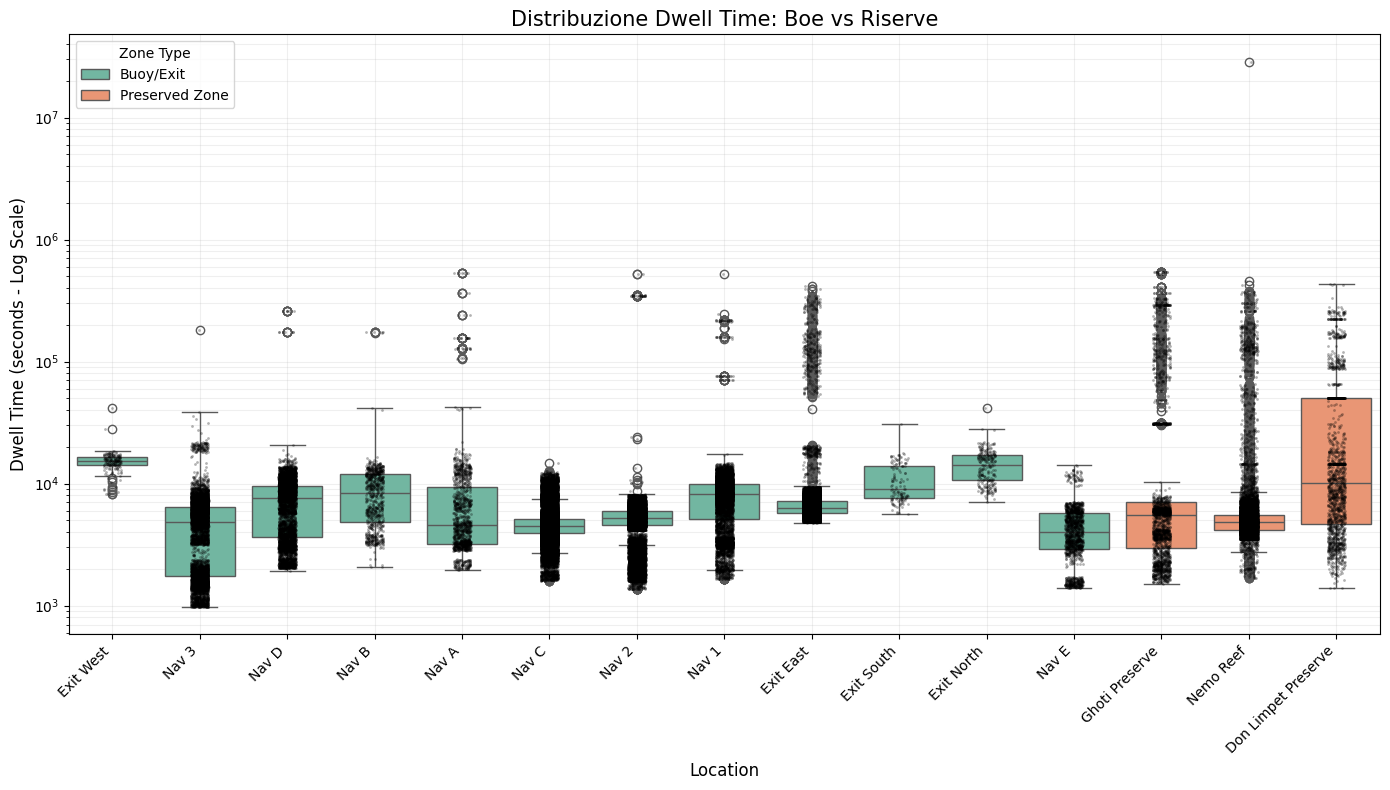

In [ ]:
PRESERVE_ZONES = ["Ghoti Preserve", "Nemo Reef", "Don Limpet Preserve"]
FISHING_ZONES = ["Wrasse Beds", "Cod Table", "Tuna Shelf"]
LAND_ZONES = ["Suna Island", "Silent Sanctuary", "Tull Island", "Mansfield Island", "Makara Shoal"]
CITY_LABELS = ["Himark", "Lomark", "Haacklee", "Port Grove", "Paackland", "South Paackland", "Centralia"]

# PULIZIA DEI NOMI
links_df['clean_location'] = links_df['source'].astype(str).str.replace("City of ", "")

# FUNZIONE DI CATEGORIZZAZIONE 
def get_category(loc_name):
    if loc_name in PRESERVE_ZONES:
        return 'Preserved Zone'
    elif loc_name in FISHING_ZONES:
        return 'Fishing Zone (Legal)'
    elif loc_name in LAND_ZONES or loc_name in CITY_LABELS:
        return 'Port/Land (Excluded)'
    else:
        return 'Buoy/Exit'

# Applico la funzione per creare la colonna CHE MANCAVA
links_df['location_type'] = links_df['clean_location'].apply(get_category)

# FILTRAGGIO
# Vogliamo vedere solo: Riserve e Boe
target_categories = ['Preserved Zone', 'Buoy/Exit']
df_analysis = links_df[links_df['location_type'].isin(target_categories)].copy()

# Assicuriamoci che dwell sia numerico e > 0
df_analysis['dwell'] = pd.to_numeric(df_analysis['dwell'], errors='coerce')
df_analysis = df_analysis[df_analysis['dwell'] > 0]

# PLOT
plt.figure(figsize=(14, 8))
plt.yscale('log') # Scala logaritmica

# Boxplot
sns.boxplot(
    x='clean_location', 
    y='dwell', 
    hue='location_type', 
    data=df_analysis, 
    palette="Set2",
    dodge=False 
)

# Stripplot (i puntini sopra)
sns.stripplot(
    x='clean_location', 
    y='dwell', 
    data=df_analysis, 
    color='black', 
    alpha=0.3, 
    jitter=True, 
    size=2
)

plt.title('Distribuzione Dwell Time: Boe vs Riserve', fontsize=15)
plt.ylabel('Dwell Time (seconds - Log Scale)', fontsize=12)
plt.xlabel('Location', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.legend(title='Zone Type')

plt.tight_layout()
plt.show()